In [1]:
# Importa as libs necessárias para criar os gráficos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [2]:
# Abre os dados do arquivo .csv
dados = pd.read_csv('dataset.csv')

# Permite a ordenação dos dados por dia
datas = list(dados['Data'])

for i in range(len(datas)):
  datas[i] = datas[i].replace('/', '\n')
  datas[i] = datas[i].replace('2020', '')

In [3]:
# Configurando o estilo do plot
# Paleta de cores para os plots: https://lospec.com/palette-list/resurrect-64
plt.style.use('seaborn-whitegrid')

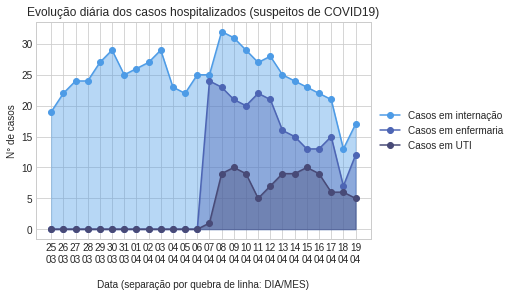

In [4]:
# Gráfico representando a evolução dos casos em Internação, Enfermaria e UTI

# Casos em internação
plt.plot(list(dados.index), np.array(dados['CV19-CSI']), color = '#4d9be6', linestyle = 'solid', label = 'Casos em internação', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-CSI']), color = '#4d9be6', alpha = 0.4)

# Casos na enfermaria
plt.plot(list(dados.index), np.array(dados['CV19-CSE']), color = '#4d65b4', linestyle = 'solid', label = 'Casos em enfermaria', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-CSE']), color = '#4d65b4', alpha = 0.4)

# Casos em UTI
plt.plot(list(dados.index), np.array(dados['CV19-CSUTI']), color = '#484a77', linestyle = 'solid', label = 'Casos em UTI', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-CSUTI']), color = '#484a77', alpha = 0.4)

plt.xticks(list(dados.index), datas)
plt.title('Evolução diária dos casos hospitalizados (suspeitos de COVID19)')
plt.xlabel('Data (separação por quebra de linha: DIA/MES)')
plt.ylabel('N° de casos')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('plots/CV19-CSH.png', bbox_inches='tight')
plt.show()

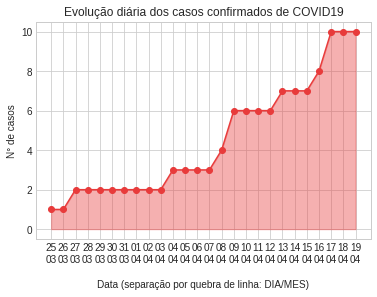

In [5]:
# Gráfico representando os casos confirmados de COVID19
plt.plot(list(dados.index), np.array(dados['CV19-CONF']), color = '#e83b3b', linestyle = 'solid', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-CONF']), color = '#e83b3b', alpha = 0.4)

plt.xticks(list(dados.index), datas)
plt.title('Evolução diária dos casos confirmados de COVID19')
plt.xlabel('Data (separação por quebra de linha: DIA/MES)')
plt.ylabel('N° de casos')

plt.savefig('plots/CV19-CONF.png', bbox_inches='tight')
plt.show()

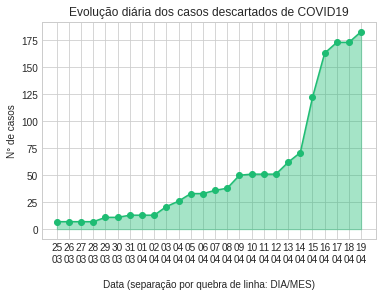

In [6]:
# Gráfico representando os casos confirmados de COVID19
plt.plot(list(dados.index), np.array(dados['CV19-DESC']), color = '#1ebc73', linestyle = 'solid', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-DESC']), color = '#1ebc73', alpha = 0.4)

plt.xticks(list(dados.index), datas)
plt.title('Evolução diária dos casos descartados de COVID19')
plt.xlabel('Data (separação por quebra de linha: DIA/MES)')
plt.ylabel('N° de casos')

plt.savefig('plots/CV19-DESC.png', bbox_inches='tight')
plt.show()

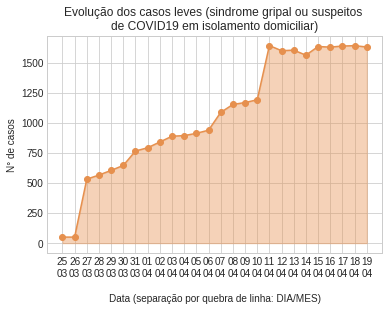

In [7]:
# Gráfico representando as notificações de casos com sindrome gripal ou casos em isolamento de COVID19
plt.plot(list(dados.index), np.array(dados['FLU-NOTISO']), color = '#e6904e', linestyle = 'solid', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['FLU-NOTISO']), color = '#e6904e', alpha = 0.4)

plt.xticks(list(dados.index), datas)
plt.title('Evolução dos casos leves (sindrome gripal ou suspeitos \nde COVID19 em isolamento domiciliar)')
plt.xlabel('Data (separação por quebra de linha: DIA/MES)')
plt.ylabel('N° de casos')

plt.savefig('plots/FLU-NOTISO.png', bbox_inches='tight')
plt.show()

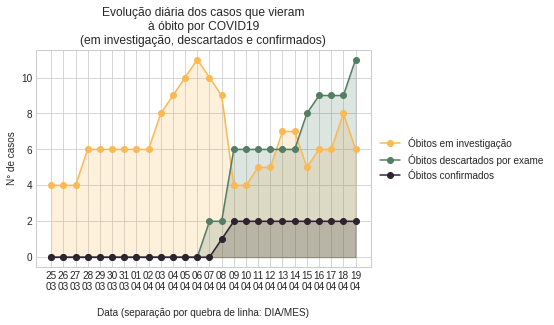

In [12]:
# Gráfico representando a evolução dos casos que vierama a óbito

# Óbitos em investigação
plt.plot(list(dados.index), np.array(dados['CV19-MINV']), color = '#fbb954', linestyle = 'solid', label = 'Óbitos em investigação', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-MINV']), color = '#fbb954', alpha = 0.2)

# Óbitos descartados
plt.plot(list(dados.index), np.array(dados['CV19-MDESC']), color = '#547e64', linestyle = 'solid', label = 'Óbitos descartados por exame', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-MDESC']), color = '#547e64', alpha = 0.2)

# Óbitos confirmados
plt.plot(list(dados.index), np.array(dados['CV19-MCONF']), color = '#2e222f', linestyle = 'solid', label = 'Óbitos confirmados', marker = 'o')
plt.fill_between(list(dados.index), np.array(dados['CV19-MCONF']), color = '#2e222f', alpha = 0.2)

plt.xticks(list(dados.index), datas)
plt.title('Evolução diária dos casos que vieram\nà óbito por COVID19\n(em investigação, descartados e confirmados)')
plt.xlabel('Data (separação por quebra de linha: DIA/MES)')
plt.ylabel('N° de casos')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('plots/CV19-MIDC.png', bbox_inches='tight')
plt.show()

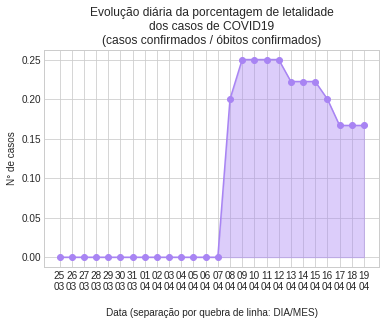

In [9]:
# Gráfico representando a porcetagem de letalidade do COVID19
letalidade = np.array(dados['CV19-MCONF']) / (np.array(dados['CV19-CONF']) + np.array(dados['CV19-MCONF']))

plt.plot(list(dados.index), letalidade, color = '#a884f3', linestyle = 'solid', marker = 'o')
plt.fill_between(list(dados.index), letalidade, color = '#a884f3', alpha = 0.4)

plt.xticks(list(dados.index), datas)
plt.title('Evolução diária da porcentagem de letalidade\ndos casos de COVID19\n(casos confirmados / óbitos confirmados)')
plt.xlabel('Data (separação por quebra de linha: DIA/MES)')
plt.ylabel('N° de casos')

plt.savefig('plots/CV19-LET.png', bbox_inches='tight')
plt.show()

In [10]:
ultimo_dia_atualizado = dados.loc[len(dados)-1, :]

with open('dados-ultimodia.obj', 'wb') as ultimo_dia_file:
    pickle.dump(ultimo_dia_atualizado, ultimo_dia_file)

print(ultimo_dia_atualizado)

Data          19/04/2020
CV19-CSI              17
CV19-CSE              12
CV19-CSUTI             5
CV19-CONF             10
CV19-DESC            183
CV19-MINV              6
CV19-MDESC            11
CV19-MCONF             2
FLU-NOTISO          1632
Name: 25, dtype: object
